[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/abdenlab/bbs741/blob/master/01_pca-digits.ipynb)

In [1]:
%matplotlib widget
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [2]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Inspect the data

Each digit is a flattened (8x8) 64-pixel image.

That means each data observation is a feature vector of greyscale intensities for each pixel.

In [3]:
print(digits.keys())
digits['data'].shape

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


(1797, 64)

interactive(children=(IntSlider(value=0, description='i', max=1797), Output()), _dom_classes=('widget-interact…

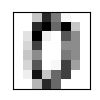

In [4]:
plt.figure(figsize=(1, 1))
ax = plt.subplot(111)
ax.set_aspect(1)

@interact(i=(0, digits['data'].shape[0]))
def show_digit(i=0):
    ax.matshow(digits['data'][i, :].reshape(8, 8), cmap='Greys')
    ax.set_xticks([])
    ax.set_yticks([])

# Full PCA, Projections, and Biplot of PC1 vs PC2

In [5]:
model = PCA()  
projected = model.fit_transform(digits.data)
print(digits['data'].shape)
print(projected.shape)

(1797, 64)
(1797, 64)


Here's a visualization of the first 100 data examples in the original representation (rows on the left matrix), and their projection onto the principal components (rows on the right matrix).

Notice

* While the feature values in our original feature space is non-negative, our projections onto PC space admit negative values as well as positive ones. This shouldn't be too surprising: remember that (1) our data was mean-centered before the PCA rotation, and (2) PC directions have arbitrary sign.
* Higher order PC scores towards the right are less important because they occur along directions of the smallest variance in our data cloud.

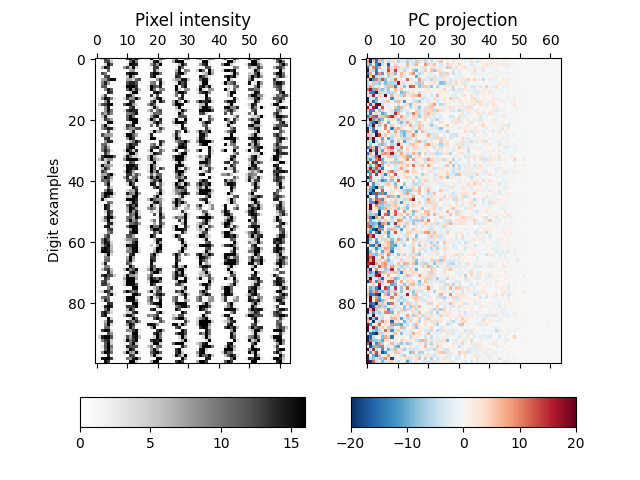

In [6]:
gs = plt.GridSpec(nrows=2, ncols=2, height_ratios=[10, 1])
plt.figure()

ax = plt.subplot(gs[0, 0])
img = ax.matshow(digits['data'][:100, :], cmap='Greys')
plt.ylabel('Digit examples')
plt.title('Pixel intensity')
cax = plt.subplot(gs[1, 0])
plt.colorbar(img, cax=cax, orientation='horizontal')

ax = plt.subplot(gs[0, 1])
img = ax.matshow(projected[:100, :], cmap='RdBu_r', vmin=-20, vmax=20)
plt.title('PC projection')
cax = plt.subplot(gs[1, 1])
plt.colorbar(img, cax=cax, orientation='horizontal')

Let's project the data points onto the first two PCs, i.e. lets plot rows from the first two columns of the matrix above on the right.

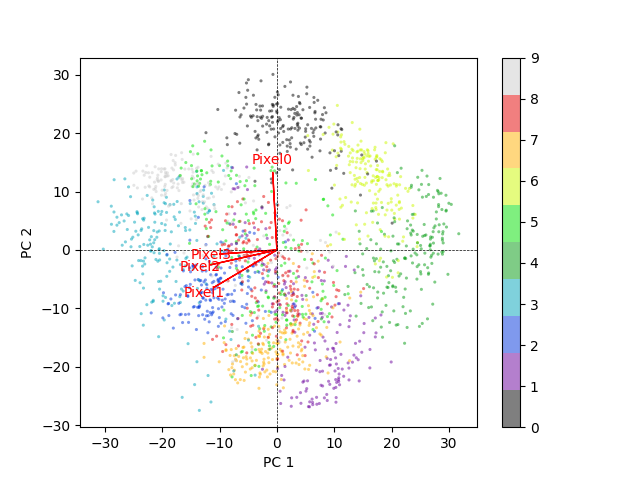

In [7]:
plt.figure()
plt.axhline(0, c='k', lw=0.5, ls='--')
plt.axvline(0, c='k', lw=0.5, ls='--')

# Score plot
plt.scatter(
    projected[:, 0], 
    projected[:, 1],
    c=digits['target'], 
    s=5,
    edgecolor='none', 
    alpha=0.5,
    cmap=plt.cm.get_cmap('nipy_spectral', 10)
)

# Loading plot
for i in [0, 1, 2, 3]:
    # re-scale the factor loading vector to have length = sqrt(eig)
    x = model.components_[0, i] 
    y = model.components_[1, i]
    sig = np.sqrt(model.explained_variance_[i])
    v = np.array([x, y]) / np.linalg.norm(np.array([x, y])) * sig
    
    plt.arrow(0, 0, v[0], v[1], color='r')
    plt.text(v[0] * 1.15, v[1] * 1.15, f"Pixel{i}", color='r', ha='center', va='center')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar();

# PC loadings and explained variance

In [8]:
full_model = PCA()
full_model.fit(digits['data'])

PCA()

Here's what our full set of PC vectors look like: the columns of the heatmap below. Note that periodically we see pixels that provide little explanatory information to our PCs (near 0 loading values), corresponding to image regions that are usually blank across all digits, like the corners.

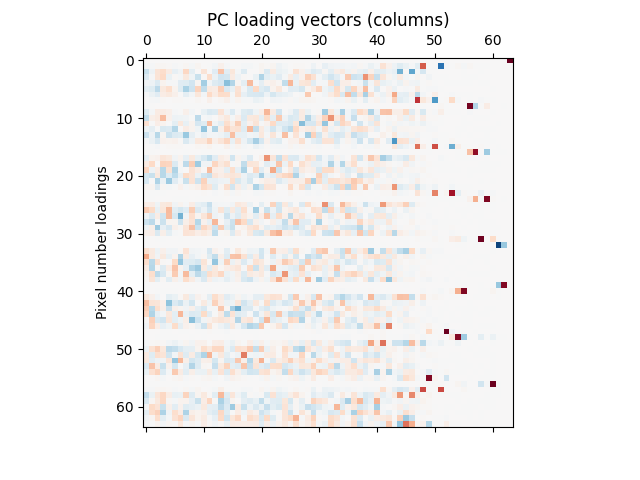

In [9]:
V = model.components_.T
plt.figure()
ax = plt.subplot(111)
ax.matshow(V, cmap='RdBu_r', vmin=-1, vmax=1, aspect=1)
ax.set_title('PC loading vectors (columns)')
ax.set_ylabel('Pixel number loadings');

Just like the eigenfaces example, we can think of our PCs as "eigendigits" by reshaping the PCs into 8x8 images. Every digit example in our dataset can be expressed as a linear combination of the eigendigit images. You can see that the eigendigits towards the end (corresponding to smaller eigenvalues) appear relatively uninformative.

interactive(children=(IntSlider(value=0, description='i', max=64), Output()), _dom_classes=('widget-interact',…

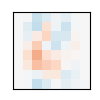

In [10]:
plt.figure(figsize=(1, 1))
ax = plt.subplot(111)
ax.set_aspect(1)

@interact(i=(0, model.components_.shape[0]))
def show_digit(i=0):
    ax.matshow(model.components_[i, :].reshape(8, 8), cmap='RdBu_r', vmin=-1, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])

Remember that these are unit vectors.

In [11]:
np.linalg.norm(V, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Here's a [scree](https://en.wikipedia.org/wiki/Scree_plot) plot of the eigenvalues / explained variance.

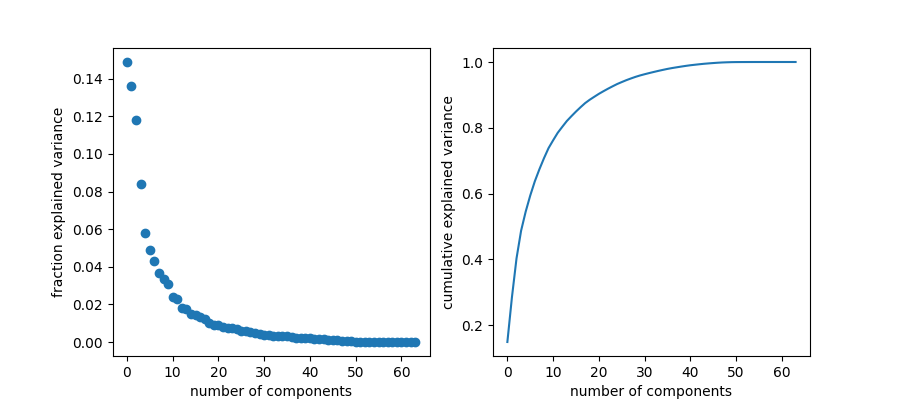

In [12]:
gs = plt.GridSpec(nrows=1, ncols=2)
plt.figure(figsize=(9, 4))

plt.subplot(gs[0])
plt.plot(full_model.explained_variance_ratio_, 'o')
plt.xlabel('number of components')
plt.ylabel('fraction explained variance');

plt.subplot(gs[1])
plt.plot(np.cumsum(full_model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [13]:
model._fit_full??

Signature: model._fit_full(X, n_components)
Source:   
    def _fit_full(self, X, n_components):
        """Fit the model by computing full SVD on X."""
        n_samples, n_features = X.shape

        if n_components == "mle":
            if n_samples < n_features:
                raise ValueError(
                    "n_components='mle' is only supported if n_samples >= n_features"
                )
        elif not 0 <= n_components <= min(n_samples, n_features):
            raise ValueError(
                "n_components=%r must be between 0 and "
                "min(n_samples, n_features)=%r with "
                "svd_solver='full'" % (n_components, min(n_samples, n_features))
            )
        elif n_components >= 1:
            if not isinstance(n_components, numbers.Integral):
                raise ValueError(
                    "n_components=%r must be of type int "
                    "when greater than or equal to 1, "
                    "was of type=%r" % (n_compone

Learn more about [scipy.linalg.svd](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) and [scipy.sparse.linalg.svds](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html).